In [1]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)



Mounted at /content/gdrive


# New Section

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
dic_train = r'/content/gdrive/MyDrive/שנה ד/שנה ד סמסטר א/deep learning/mission 1/train'
dic_val = r'/content/gdrive/MyDrive/שנה ד/שנה ד סמסטר א/deep learning/mission 1/val'
dic_test = r'/content/gdrive/MyDrive/שנה ד/שנה ד סמסטר א/deep learning/mission 1/test'
categories = ['NORMAL','PNEUMONIA']
print('load')


load


In [4]:
#load train data
train_data = []
train_labels = []

for x in categories:
  train_path = os.path.join(dic_train,x)

  for img in os.listdir(train_path):
    img_path = os.path.join(train_path,img)
    image = keras.utils.load_img(img_path,target_size=(224,224))
    image = keras.utils.img_to_array(image)
    image = keras.applications.resnet50.preprocess_input(image)
    train_data.append(image)
    train_labels.append(x)

In [5]:
#load val data
val_data = []
val_labels = []

for x in categories:
  val_path = os.path.join(dic_val,x)
  for img in os.listdir(val_path):
    img_path = os.path.join(val_path,img)
    image = keras.utils.load_img(img_path,target_size=(224,224))
    image = keras.utils.img_to_array(image)
    image = keras.applications.resnet50.preprocess_input(image)
    val_data.append(image)
    val_labels.append(x)

In [6]:
#load test data
test_data = []
test_labels = []

for x in categories:
  test_path = os.path.join(dic_test,x)
        
  for img in os.listdir(test_path):
    img_path = os.path.join(test_path,img)
    image = keras.utils.load_img(img_path,target_size=(224,224))
    image = keras.utils.img_to_array(image)
    image = keras.applications.resnet50.preprocess_input(image)
    test_data.append(image)
    test_labels.append(x) 

In [7]:
print(len(train_labels))
print(len(val_labels))
print(len(test_labels))


5216
16
624


shuffle the data & labels

In [8]:
import random as rd

a = list(zip(train_data , train_labels))
b = list(zip(val_data , val_labels))
c = list(zip(test_data , test_labels))
rd.shuffle(a)
rd.shuffle(b)
rd.shuffle(c)
train_data , train_labels = zip(*a)
val_data , val_labels = zip(*b)
test_data , test_labels = zip(*c)

In [9]:
print(val_labels)

('PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PNEUMONIA


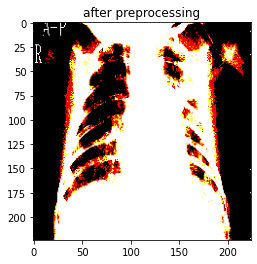

In [10]:
plt.imshow(val_data[1])
plt.title('after preprocessing')
print(val_labels[1])

pre processing to the data

In [11]:
# Scale images to the [0, 1] range
import numpy as np

train_data = np.asarray(train_data)
val_data = np.asarray(val_data)
test_data = np.asarray(test_data)

train_data = train_data.astype("float32") / 255
val_data = val_data.astype("float32") / 255
test_data = test_data.astype("float32") / 255


In [12]:
# convert class vectors to binary class matrices
num_classes = 2

train_labels = [0 if i == 'NORMAL' else 1 for i in train_labels]
val_labels = [0 if i == 'NORMAL' else 1 for i in val_labels]
test_labels = [0 if i == 'NORMAL' else 1 for i in test_labels]
y_test = test_labels

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)####
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes)####
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)####

input_shape = train_data[1].shape
print(input_shape)
print(train_labels)

(224, 224, 3)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


model definition

In [13]:
model = []
model = tf.keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Flatten(),  
        keras.layers.Dense(32, activation="relu",kernel_initializer = 'he_uniform'),
        keras.layers.Dropout(0.1),    
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 32)                4816928   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,816,994
Trainable params: 4,816,994
Non-trainable params: 0
_________________________________________________________________


In [14]:
batch_size = 16
epochs = 50
lr = 0.0000001
adam = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.95)

model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

train the model

In [15]:
his = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
294/294 [==============================] - 11s 34ms/step - loss: 0.6295 - accuracy: 0.6498 - val_loss: 0.5472 - val_accuracy: 0.7567
Epoch 2/50
294/294 [==============================] - 10s 34ms/step - loss: 0.5171 - accuracy: 0.7776 - val_loss: 0.4637 - val_accuracy: 0.7989
Epoch 3/50
294/294 [==============================] - 10s 33ms/step - loss: 0.4488 - accuracy: 0.8228 - val_loss: 0.3966 - val_accuracy: 0.8755
Epoch 4/50
294/294 [==============================] - 10s 33ms/step - loss: 0.3959 - accuracy: 0.8602 - val_loss: 0.3475 - val_accuracy: 0.9061
Epoch 5/50
294/294 [==============================] - 10s 34ms/step - loss: 0.3584 - accuracy: 0.8773 - val_loss: 0.3115 - val_accuracy: 0.9119
Epoch 6/50
294/294 [==============================] - 10s 33ms/step - loss: 0.3271 - accuracy: 0.8943 - val_loss: 0.2840 - val_accuracy: 0.9195
Epoch 7/50
294/294 [==============================] - 10s 34ms/step - loss: 0.3068 - accuracy: 0.9005 - val_loss: 0.2621 - val_accuracy:

loss and accuracy plotting

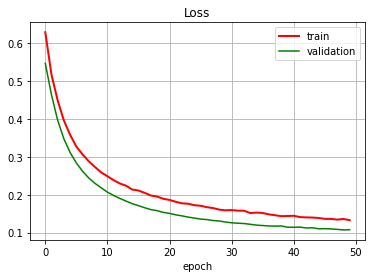

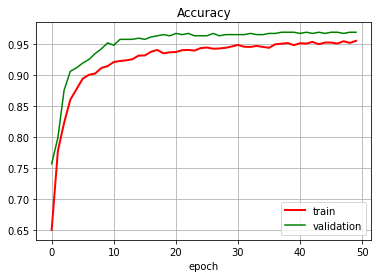

In [16]:
xx = np.arange(epochs)
train_loss = his.history.get('loss')
val_loss = his.history.get('val_loss')
train_accuracy = his.history.get('accuracy')
val_accuracy = his.history.get('val_accuracy')

plt.plot(xx,train_loss,'-r',linewidth=2)
plt.plot(xx,val_loss,'-g')
plt.title('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.grid()
plt.show()

plt.plot(xx,train_accuracy,'-r',linewidth=2)
plt.plot(xx,val_accuracy,'-g')
plt.title('Accuracy')
plt.legend(['train', 'validation'], loc='lower right')
plt.xlabel('epoch')
plt.grid()
plt.show()


testing the model on test set

In [17]:
loss,score = model.evaluate(test_data, test_labels)
print("Test loss:", loss)
print("Test accuracy:", score)



20/20 [==============================] - 0s 17ms/step - loss: 0.5732 - accuracy: 0.7628
Test loss: 0.5731586813926697
Test accuracy: 0.7628205418586731


Confusion matrix

Precision:  0.7291666666666666
Recall:  0.9871794871794872


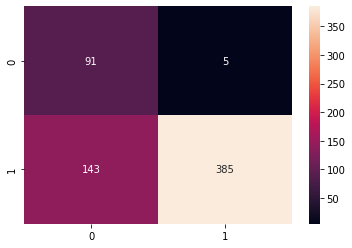

In [18]:
from sklearn.metrics import confusion_matrix , precision_score,recall_score
import seaborn as sns

y_pred=np.argmax(model.predict(test_data), axis=-1)# for softmax
y_true=np.argmax(test_labels,axis=1)

precision = precision_score(y_true,y_pred)
recall = recall_score(y_true,y_pred)

print('Precision: ',precision)
print('Recall: ',recall)

cm = confusion_matrix(y_pred,y_true)
f = sns.heatmap(cm, annot=True, fmt='d')